# Wine dataset - Feature Engineering and Logistic Regression(wine_type)

# 1. Import libraries

In [2]:
#Loading required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 2. Import dataset

In [3]:
wines = pd.read_csv('wines.csv')
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_label
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium


# 3. Set independent and response variables

In [4]:
x=wines.iloc[:,:-2]
y=wines.iloc[:,12]

# 4. Train-test split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# 5. Feature importance

In [7]:
#Use inbuilt class feature_importance of tree based classifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model= ExtraTreesClassifier()

In [8]:
model.fit(x,y)
print(model.feature_importances_)

[0.07019622 0.16402567 0.03260364 0.07071073 0.12105371 0.04892201
 0.26016986 0.09248808 0.04100036 0.07172768 0.01755956 0.00954247]


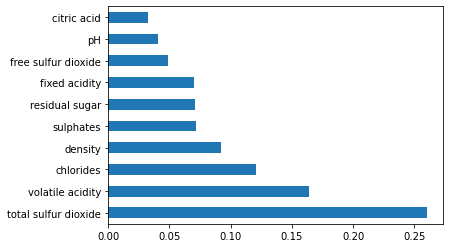

In [17]:
#Bar graph of feature importance
feat_importance = pd.Series(model.feature_importances_,index=x.columns)
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
Analysis - This explains that the variable - 
1. 'total sulfur dioxide' is the most statiscally significant and helps the most while classifying the wine_type.
2. 'citric acid' is the least stastically significant variable and helps the least while classifying the wine_type.


# 5. Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
x_ss = StandardScaler().fit(x_train)
x_sy = x_ss.transform(x_train)
x_sy_test=x_ss.transform(x_test)

# 6. Logistic Regression for wine_type Classification

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_sy,y_train)

LogisticRegression()

In [23]:
y_pred = lr.predict(x_sy_test)
y_pred

array(['red', 'red', 'white', ..., 'white', 'white', 'white'],
      dtype=object)

In [24]:
y_pred_train = lr.predict(x_sy)

# 6. a) Confusion_Matrix

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 497,    7],
       [   7, 1439]], dtype=int64)

# 6.b) Classification_Report

In [16]:
rep = classification_report(y_test,y_pred)
print('Report of wine dataset')
print(rep)

Report of wine dataset
              precision    recall  f1-score   support

         red       0.99      0.99      0.99       504
       white       1.00      1.00      1.00      1446

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



In [25]:
rep = classification_report(y_train,y_pred_train)
print('Report of wine dataset')
print(rep)

Report of wine dataset
              precision    recall  f1-score   support

         red       0.99      0.99      0.99      1095
       white       1.00      1.00      1.00      3452

    accuracy                           1.00      4547
   macro avg       0.99      0.99      0.99      4547
weighted avg       1.00      1.00      1.00      4547



# Boosting - To overcome Overfitting of Training dataset

In [26]:
from sklearn.ensemble import AdaBoostClassifier

In [31]:
adb = AdaBoostClassifier(LogisticRegression(),n_estimators=5,learning_rate=1)
adb.fit(x_sy,y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=1,
                   n_estimators=5)

In [32]:
adb.score(x_sy_test,y_test)

0.9830769230769231

In [34]:
adb.score(x_sy,y_train)

0.983945458544095

This has overcome the problem of overfitting , where the accuracy of train and test dataset was coming 100% earlier. Now the accuracy for training and test dataset is coming 98.3%